# Compare different projections

In [49]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
data_dir = '../outputs/'
namelists = ['loc', 'loc_TempAll', 'loc_TempAll_odyn_CMIP5']
sce ='rcp85'

proj_ds_list = []
for proj in namelists:
    proj_ds_list.append(xr.open_dataset(f'{data_dir}SeaLevelPDF_{proj}_{sce}.nc'))


### Compare the percentiles in 2100

In [11]:
proj_ds_list[0].Perc_ts.sel(time=2100, proc='Total')

<xarray.DataArray 'Perc_ts' (percentiles: 7)>
array([ 41.7,  51.2,  61.1,  75.6,  91.8, 105.8, 123.4])
Coordinates:
    time         int64 2100
    proc         <U5 'Total'
  * percentiles  (percentiles) int64 1 5 17 50 83 95 99
Attributes:
    units:      cm
    long_name:  Selection of time series for a few percentiles. Other quantil...

In [33]:
for idx, proj in enumerate(namelists):
    df = proj_ds_list[idx].Perc_ts.sel(time=2100, proc='Total').to_dataframe()
    if idx == 0:
        tot_df = pd.DataFrame(df['Perc_ts'])
        tot_df = tot_df.rename(columns={'Perc_ts': proj})
    else:
        tot_df[proj] = df['Perc_ts']
tot_df

,loc,loc_TempAll,loc_TempAll_odyn_CMIP5
percentiles,,,
1,41.7,41.8,37.0
5,51.2,51.2,47.0
17,61.1,61.1,57.3
50,75.6,75.4,72.4
83,91.8,91.6,89.1
95,105.8,105.6,103.3
99,123.4,123.1,121.0


### Compare the time series of individual contributors

In [37]:
nb_proc = len(proj_ds_list[0].proc)
perc = 50

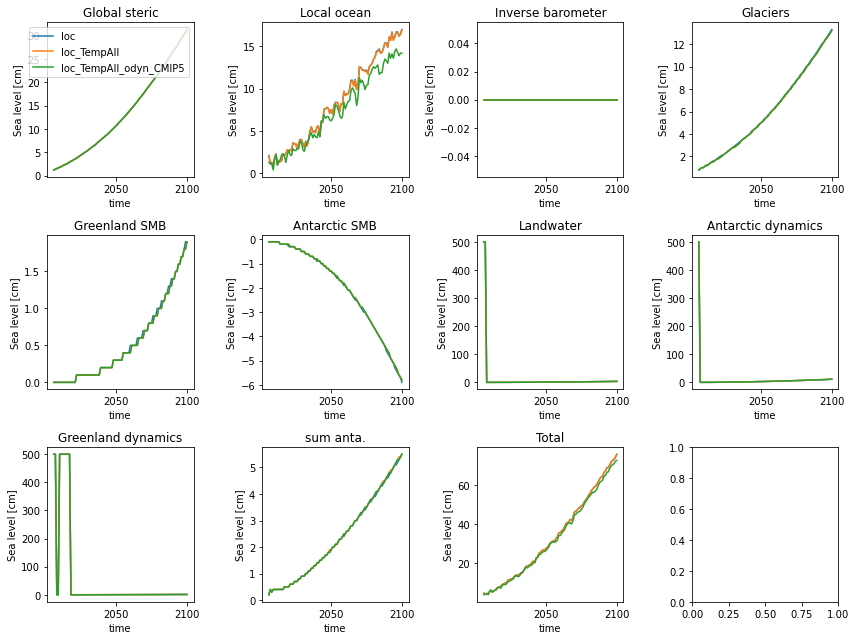

In [70]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(12,9))
for m in range(nb_proc):
    lin=int(m/4)
    col=m%4
    for i in range(len(proj_ds_list)):
        proj_ds_list[i]['Perc_ts'].attrs['long_name'] = 'Sea level'
        proj_ds_list[i].Perc_ts.sel(percentiles=perc).isel(proc=m).plot(ax=axes[lin,col])
    axes[lin,col].set_title(proj_ds_list[0].proc[m].values)
axes[0,0].legend(namelists)
plt.tight_layout()

In [59]:
proj_ds_list[0]['Perc_ts'].attrs['long_name'] = 'test'

In [47]:
proj_ds_list[0].proc[0] #.values.item()

<xarray.DataArray 'proc' ()>
array('Global steric', dtype='<U13')
Coordinates:
    proc     <U13 'Global steric'